## Solve LINEAR

In [ ]:
a, b, c = sympy.symbols('a, b, c')
A = sympy.Matrix([[6,5,2],[10,2,7],[6,6,-6]])
x = sympy.Matrix([8,2,-2])
answer = sympy.linsolve((A,x),[a,b,c])
answer = list(answer)

## Solving equations

In [ ]:
a,b,c,d,x,y,rhs = sp.symbols('a,b,c,d,x,y,rhs')

u = a*x+b*y+c*x*y+d - rhs
Eq1 = u.subs({x:0,y:0,rhs:0})
Eq2 = u.subs({x:5,y:0,rhs:5})
Eq3 = u.subs({x:5,y:10,rhs:-1})
Eq4 = u.subs({x:0,y:10,rhs:1})

print(sp.linsolve([Eq1,Eq2,Eq3,Eq4],[a,b,c,d]))
print('u = {}'.format(u.subs({a:1/2,b:1/10,c:-9/100,d:0,rhs:0})))

## Plotting

In [ ]:
sp.plotting.plot(v,(x,0,1.5),title='v(x)')

## Plotting displacement fields

In [ ]:
upn = sp.lambdify([x,y],up,'numpy')
vpn = sp.lambdify([x,y],vp,'numpy')

xn = np.linspace(-50,50,21)
yn = np.linspace(-5,5,21)

X,Y = np.meshgrid(xn,yn)

U = upn(X,Y)
V = vpn(X,Y)

plt.quiver(X,Y,U,V)
plt.show()

## Strain to Stress

In [ ]:
rho, g, nu, E, W, B, H, x, y, z = sympy.symbols('rho, g, nu, E, W, B, H, x, y, z')

u = -nu*rho*g*x*z/E
v = -nu*rho*g*y*z/E
w = rho*g*z**2/(2*E) + nu*rho*g*(x**2+y**2)/(2*E) - rho*g*H**2/(2*E)

displacement_vector = [u,v,w]
spatial_coordinates = [x, y, z]

displacement_gradient = sympy.derive_by_array(displacement_vector, spatial_coordinates)
strain_matrix = 0.5*(displacement_gradient.transpose() + displacement_gradient)

display(strain_matrix)

In [ ]:
D = E/((1 + nu)*(1 - 2*nu))*sympy.Matrix([[1-nu,nu,nu,0,0,0],[nu,1-nu,nu,0,0,0],[nu,nu,1-nu,0,0,0],[0,0,0,0.5-nu,0,0],[0,0,0,0,0.5-nu,0],[0,0,0,0,0,0.5-nu]])


strain_vector = sympy.Matrix([strain_matrix[0,0],strain_matrix[1,1],strain_matrix[2,2],2*strain_matrix[1,2],2*strain_matrix[0,2],2*strain_matrix[0,1]])

stress_vector = sp.simplify(D*strain_vector)

display(stress_vector)


## Element in equilibrium

In [ ]:
def StrainMatrixFromDisplacement3d(u,v,w,x,y,z):
    displacement_vector = [u,v,w] 
    spatial_coordinates = [x, y, z]
    displacement_gradient = sp.derive_by_array(displacement_vector, spatial_coordinates)
    return sp.simplify(0.5*(displacement_gradient.transpose() + displacement_gradient))

def EvaluateEqulibrium3d(StressVector,x ,y ,z , ExpectedXresidual = 0,ExpectedYresidual = 0,ExpectedZresidual = 0):
    Eq1 = sp.derive_by_array(StressVector[0],x) + sp.derive_by_array(StressVector[5],y) + sp.derive_by_array(StressVector[4],z)-ExpectedXresidual
    print('Equilibrium first equation: {}'.format(Eq1))

    Eq2 = sp.derive_by_array(StressVector[5],x) + sp.derive_by_array(StressVector[1],y) + sp.derive_by_array(StressVector[3],z)-ExpectedYresidual
    print('Equilibrium second equation: {}'.format(Eq2))

    Eq3 = sp.derive_by_array(StressVector[4],x) + sp.derive_by_array(StressVector[3],y) + sp.derive_by_array(StressVector[2],z)-ExpectedZresidual
    print('Equilibrium third equation: {}'.format(Eq3))

## Strain Energy

In [ ]:
StrainEnergy = 0.5*np.dot(qArrayFloat.T,np.dot(StiffnessMatrixNumpyFloat,qArrayFloat))

## Weak Form 1D

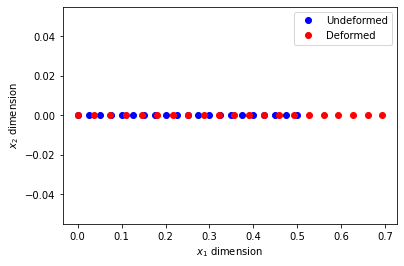

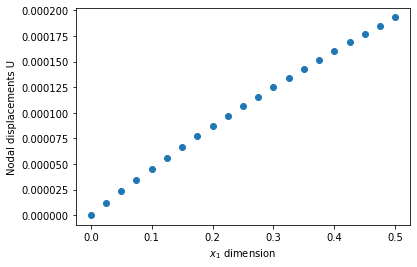

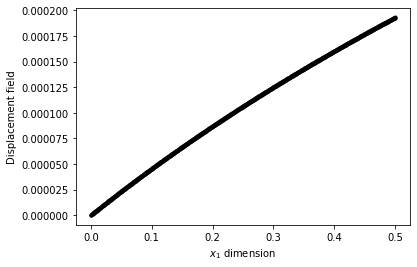

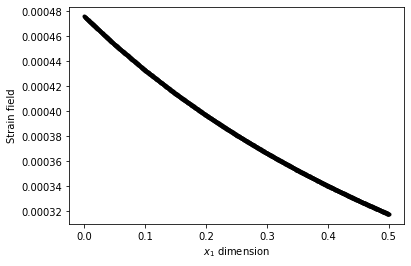

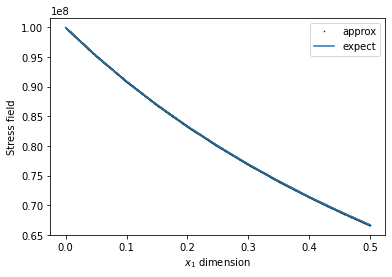

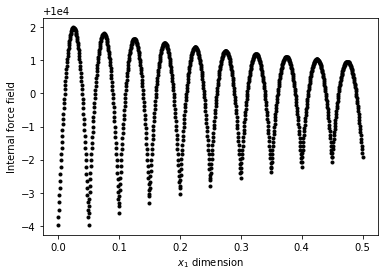

In [4]:
# Select the number of elements: 10, 100


import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


no_elements = 10



def C(xi,local_coords):
    C_val = 210e9
    return C_val

def N1(xi):
    N_1 = -0.5*xi*(1-xi)
    return N_1

def N2(xi):
    N_2 = 0.5*xi*(1+xi)
    return N_2

def N3(xi):
    N_3 = (1-xi)*(1+xi)
    return N_3

def N1(xi):
    N_1 = -0.5*xi*(1-xi)
    return N_1

def N2(xi):
    N_2 = 0.5*xi*(1+xi)
    return N_2

def N3(xi):
    N_3 = (1-xi)*(1+xi)
    return N_3

def dN1(xi):
    dN_1 = xi-0.5
    return dN_1

def dN2(xi):
    dN_2 = xi + 0.5
    return dN_2

def dN3(xi):
    dN_3 = -2*xi
    return dN_3

def x(xi,loc_coords):
    x_xi = N1(xi)*loc_coords[0,0] + N2(xi)*loc_coords[0,1] + N3(xi)*loc_coords[0,2]
    return x_xi 

def u(xi,q):
    u_xi = N1(xi)*q[0,0] + N2(xi)*q[0,1] + N3(xi)*q[0,2]
    return u_xi 

def dN(z):
    dN_vec = np.array([[dN1(z),dN2(z),dN3(z)]])
    return dN_vec

def dxdxi(xi,local_coords):
    dxdz_val = np.dot(dN(xi),local_coords.T)
    return dxdz_val

def B(xi,local_coords):
    B_vec = 1/dxdxi(xi,local_coords)*dN(xi)
    return B_vec

def A(xi,local_coords):
    A_val = 0.0001 + 0.0001*x(xi,local_coords)
    return A_val


def K_term(xi,local_coords):
    term = B(xi,local_coords)*C(xi,local_coords)*B(xi,local_coords).T*A(xi,local_coords)*dxdxi(xi,local_coords)
    return term



values = np.array([[0,0,0,0,0],[-1/np.sqrt(3),1/np.sqrt(3),0,0,0],[-3409/4401,0,3409/4401,0,0],
                  [-4744/5509,-8609/25322,8609/25322,4744/5509,0],
                  [-7669/8463,-5333/9904,0,5333/9904,7669/8463]])
weights = np.array([[2,0,0,0,0],[1,1,0,0,0],[5/9,8/9,5/9,0,0],
                   [3681/10582,6901/10582,6901/10582,3681/10582,0],
                   [956/4035,1075/2246,128/225,1075/2246,956/4035]])


def K_local_func(local_node_coordinates):
    sum_t = np.zeros((3,3))
    gaussian_quadrature_pts = 3
    g_ind = gaussian_quadrature_pts - 1

    for i in range(gaussian_quadrature_pts):
        sum_t = sum_t + weights[g_ind,i]*K_term(values[g_ind,i],local_node_coordinates)
        
    K_local = sum_t
    return K_local

def K_assemble(K_global,K_local,local_inds,element_no):
    for j in range(3):
            j_global = element_no*2 + j
            for k in range(3):
                k_global = element_no*2 + k
                K_global[j_global,k_global] = K_global[j_global,k_global] + K_local[local_inds[j],local_inds[k]]
    
    return K_global



def K_global_func(no_elements,global_node_coordinates):
    
    no_nodes = np.max(np.shape(global_node_coordinates))
    
    K_global = np.zeros((no_nodes,no_nodes))
    local_inds = np.array([0,2,1])
    
    for e in range(no_elements):
        coords = global_node_coordinates[e*2:e*2+3]
        local_node_coordinates = np.array([coords[local_inds]])        
        K_local = K_local_func(local_node_coordinates)
        K_global = K_assemble(K_global,K_local,local_inds,e)
                
    return K_global


def problem_def_solveU(no_elements,global_node_coordinates):
    F = 10000
    
    # loadings info
    A_end = 0.0001 + 0.0001*global_node_coordinates[-1]
    t1 = F/(A_end)

    no_nodes = np.max(np.shape(global_node_coordinates))
   #pts = gaussian_quadrature_pts - 1
    
    K_global = K_global_func(no_elements,global_node_coordinates)
    
    F_global = np.zeros((no_nodes,1))
    U_global = np.zeros((no_nodes,1))
    
    U_global[0] = 0
    F_global[no_nodes-1] = t1*A_end
    
    Kpp = K_global[0,0]
    Kfp = K_global[0,1:no_nodes]
    Kff = K_global[1:no_nodes,1:no_nodes]

    Fp = F_global[1:no_nodes,0] - Kfp*U_global[1:no_nodes,0]

    Uf = np.linalg.solve(Kff,Fp)
    U_global[1:no_nodes,0] = Uf[:]
    return U_global

def element_fields(res_per_element,local_coords,q):
    
    el_epsilon_field = np.zeros((res_per_element,1))
    el_sigma_field = np.zeros((res_per_element,1))
    el_disp_field = np.zeros((res_per_element,1))
    el_field_coords = np.zeros((res_per_element,1))
    
    xis = np.linspace(-1,1,res_per_element)
    for pt in range(res_per_element):
        xi = xis[pt]
        el_eps = np.dot(B(xi,local_coords),q.T)
        el_epsilon_field[pt,0] = el_eps
        el_sigma_field[pt,0] = el_eps*C(xi,local_coords)
        el_disp_field[pt,0] = u(xi,q)
        el_field_coords[pt,0] = x(xi,local_coords)
        
    return el_epsilon_field, el_sigma_field, el_disp_field, el_field_coords


def global_fields(U_global,res_per_element,no_elements,global_node_coordinates):
    
    epsilon_field = np.zeros((no_elements*res_per_element,1))
    sigma_field = np.zeros((no_elements*res_per_element,1))
    disp_field = np.zeros((no_elements*res_per_element,1))
    field_coords = np.zeros((no_elements*res_per_element,1))
    
    for e in range(no_elements):
        
        local_inds = np.array([0,2,1])
        coords = global_node_coordinates[e*2:e*2+3]
        local_coords = np.array([coords[local_inds]])
        
        q_st = np.array([U_global[e*2:e*2+3,0]])
        q = np.array([q_st[0,local_inds]])
        el_epsilon_field, el_sigma_field, el_disp_field, el_field_coords = element_fields(res_per_element,local_coords,q)
        
        epsilon_field[e*res_per_element:(e+1)*res_per_element,0] = el_epsilon_field[:,0]
        sigma_field[e*res_per_element:(e+1)*res_per_element,0] = el_sigma_field[:,0]
        disp_field[e*res_per_element:(e+1)*res_per_element,0] = el_disp_field[:,0]
        field_coords[e*res_per_element:(e+1)*res_per_element,0] = el_field_coords[:,0]
    
    return disp_field, epsilon_field, sigma_field, field_coords

def FEM_problem(no_elements):
    res_per_element = 101 # resolution of points sampled in the xi domain for the field of each element
    magnification_factor = 1e3 # magnification factor to be used with the nodal displacements for visualization
    
    x_length = 0.5
    no_nodes = no_elements*2 + 1
    global_node_coordinates = np.linspace(0,x_length,no_nodes)

    U_global = problem_def_solveU(no_elements,global_node_coordinates)
    disp_field, epsilon_field, sigma_field, field_coords = global_fields(U_global,res_per_element,no_elements,global_node_coordinates)
    
    gnc_def = global_node_coordinates + magnification_factor*U_global.T
    
    return global_node_coordinates, gnc_def, U_global, disp_field, epsilon_field, sigma_field, field_coords

global_node_coordinates, gnc_def, U_global, disp_field, epsilon_field, sigma_field, field_coords = FEM_problem(no_elements)
no_nodes = np.max(np.shape(global_node_coordinates))
ys = np.zeros((no_nodes,1))
    
plt.figure(1)
plt.plot(global_node_coordinates,ys,'bo',label='Undeformed')
plt.plot(gnc_def.T,ys,'ro',label='Deformed')
plt.xlabel("$x_1$ dimension")
plt.ylabel("$x_2$ dimension")
plt.legend()

plt.figure(2)
plt.plot(global_node_coordinates,U_global,'o')
plt.xlabel("$x_1$ dimension")
plt.ylabel("Nodal displacements U")

plt.figure(3)
plt.plot(field_coords,disp_field,'k.')
plt.xlabel("$x_1$ dimension")
plt.ylabel("Displacement field")

plt.figure(4)
plt.plot(field_coords,epsilon_field,'k.')
plt.xlabel("$x_1$ dimension")
plt.ylabel("Strain field")

plt.figure(5)
plt.plot(field_coords,sigma_field,'k.',label='approx',markersize=1)
plt.plot(field_coords,10000/(0.0001+field_coords*0.0001),label='expect')
plt.legend()
plt.xlabel("$x_1$ dimension")
plt.ylabel("Stress field")

plt.figure(6)
plt.plot(field_coords,sigma_field*(0.0001+field_coords*0.0001),'k.')
plt.xlabel("$x_1$ dimension")
plt.ylabel("Internal force field")
plt.show()